In [9]:
import requests
from dotenv import load_dotenv
import os

_ = load_dotenv()

GH_USER = os.environ["GH_USERNAME"]
GH_TOKEN = os.environ["GH_TOKEN"]

In [10]:
import pandas as pd

full_repo_model_df = pd.read_csv('UMLFiles_List_V2.0.csv')
full_repo_model_df

,Project,Model Link - Github
0,0-complexity/ovcdoc_public/,https://www.github.com/0-complexity/ovcdoc_pub...
1,0003088/libelektra-qt-gui-test/,https://www.github.com/0003088/libelektra-qt-g...
2,00s/deadman/,https://www.github.com/00s/deadman/tree/master...
3,01db0y/ImageUploader/,https://www.github.com/01db0y/ImageUploader/tr...
4,01db0y/ShareIt/,https://www.github.com/01db0y/ShareIt/tree/mas...
...,...,...
93602,yotomyoto/301_assignment1/,https://www.github.com/yotomyoto/301_assignmen...
93603,zeronero13/af6/,https://www.github.com/zeronero13/af6/tree/mas...
93604,zeronero13/happehardver/,https://www.github.com/zeronero13/happehardver...
93605,Akshit-/ClientServerCommunication/,https://www.github.com/Akshit-/ClientServerCom...


In [11]:
full_repo_df = full_repo_model_df.drop(columns=['Model Link - Github']).drop_duplicates(ignore_index=True)
full_repo_df

,Project
0,0-complexity/ovcdoc_public/
1,0003088/libelektra-qt-gui-test/
2,00s/deadman/
3,01db0y/ImageUploader/
4,01db0y/ShareIt/
...,...
24725,vectorxiang/vectorxiang.github.io/
24726,victorsndvg/FPL/
24727,wmde/FundraisingFrontend/
24728,yotomyoto/301_assignment1/


In [12]:
def get_star_count(repo_name):
    try:
        r = requests.get('https://api.github.com/repos/{}'.format(repo_name), auth=(GH_USER, GH_TOKEN), timeout=60)
    except requests.exceptions.RequestException as e:
        if r.status_code != 404:
            print('Error: {}'.format(e))
        return None

    return r.json().get('stargazers_count', 0)

In [13]:
print(f"No. of stars: {get_star_count('zakipauzi/concept-domain-coverage/'[:-1])}")

No. of stars: 2


In [14]:
def repo_exists(repo_name):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}', auth=(GH_USER, GH_TOKEN), timeout=60)
        return r.status_code == 200
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return False

In [15]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

tqdm.pandas()

def add_repo_exist(df):
    def fetch_exist(repo):
        return repo_exists(repo[:-1])

    with ThreadPoolExecutor(max_workers=50) as executor:
        df['Exists'] = list(tqdm(executor.map(fetch_exist, df['Project']), total=len(df['Project'])))
    return df

In [8]:
full_repo_df = add_repo_exist(full_repo_df)

100%|██████████| 24730/24730 [1:07:20<00:00,  6.12it/s]


In [ ]:
full_repo_df = full_repo_df[full_repo_df['Exists']]
full_repo_df.to_csv('full_repo_df.csv', index=False)

In [10]:
full_repo_df.head()

,Project,Exists
1,0003088/libelektra-qt-gui-test/,True
2,00s/deadman/,True
3,01db0y/ImageUploader/,True
4,01db0y/ShareIt/,True
5,01org/vmf/,True


In [11]:
full_repo_df.tail()

,Project,Exists
23805,xeguh83/8Puzzle/,True
23807,xen2/SharpLang/,True
23808,Xennis/graphical_model_editor/,True
23809,xenodium/xenodium.github.io/,True
23810,XenofoR/PAQ/,True


### Get GH projects with UML files

In [16]:
full_repo_df = pd.read_csv('full_repo_df.csv').drop(columns=['Exists'])
full_repo_df

,Project
0,0003088/libelektra-qt-gui-test/
1,00s/deadman/
2,01db0y/ImageUploader/
3,01db0y/ShareIt/
4,01org/vmf/
...,...
6868,xeguh83/8Puzzle/
6869,xen2/SharpLang/
6870,Xennis/graphical_model_editor/
6871,xenodium/xenodium.github.io/


In [17]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

def get_contributor_count(repo_name, limit_hit):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}/contributors', auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        if not limit_hit:
            print(f'Error: {e}')
            print(r.headers)
            limit_hit = True
        return None

    return len(r.json())

def add_contributor_count(df):
    
    limit_hit = False

    def fetch_contributors(repo):
        return get_contributor_count(repo[:-1], limit_hit)

    tqdm.pandas()
    with ThreadPoolExecutor(max_workers=50) as executor:
        df['Contributors'] = list(tqdm(executor.map(fetch_contributors, df['Project']), total=len(df['Project'])))
    return df

# repo_contrib_df_1 = add_contributor_count(full_repo_df)

In [18]:
import pandas as pd

repo_contrib_df = pd.read_csv('repo_contrib_df.csv')
repo_contrib_df = repo_contrib_df[:10]
repo_contrib_df

,Project,Contributors
0,0003088/libelektra-qt-gui-test/,12.0
1,01org/vmf/,11.0
2,080419android/scheduler/,3.0
3,0877624/0877624-0896919-0894785/,3.0
4,09421/Track-A-Bus/,2.0
5,100Continue/Gulu--web-server-test-tools/,2.0
6,101companies/101repo/,24.0
7,131213web/ProjectTask/,9.0
8,1string2boolthem/ProjectHub/,4.0
9,211tbc/synthesis/,4.0


In [19]:
models_df = repo_contrib_df.merge(full_repo_model_df, on='Project', how='left')
models_df.to_csv('models_df.csv', index=False)
models = models_df['Model Link - Github'].tolist()
models = [x.split('.')[-1] for x in models]
models = list(set(models))
models

['jpg', 'xmi', 'uml', 'png']

In [20]:
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

def get_graphic_files(repo_name, path=''):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}/contents/{path}', auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return ['Failed']

    files = r.json()
    graphic_files = []
    for file in files:
        if file['type'] == 'file' and file['name'].lower().endswith(('jpg', 'gif', 'jpeg', 'bmp', 'svg', 'xmi', 'uml', 'png')):
            graphic_files.append(file['path'])
        elif file['type'] == 'dir':
            graphic_files.extend(get_graphic_files(repo_name, file['path']))
    return graphic_files

def add_graphic_files(df):
    def fetch_graphic_files(repo):
        return get_graphic_files(repo[:-1])

    with ThreadPoolExecutor(max_workers=50) as executor:
        df['Graphic_Files'] = list(tqdm(executor.map(fetch_graphic_files, df['Project']), total=len(df['Project'])))
    return df

repo_contrib_graphics_df = add_graphic_files(repo_contrib_df)

  0%|          | 0/10 [00:00<?, ?it/s]

Error: 404 Client Error: Not Found for url: https://api.github.com/repos/131213web/ProjectTask/contents/tasks/task07/MusicShare/WebRoot/picture/%EF%BF%BD%EF%BF%BD%EF%BF%BD
Error: 404 Client Error: Not Found for url: https://api.github.com/repos/131213web/ProjectTask/contents/tasks/task07/MusicShare/WebRoot/picture/%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD
Error: 404 Client Error: Not Found for url: https://api.github.com/repos/131213web/ProjectTask/contents/tasks/task07/MusicShare/WebRoot/picture/%EF%BF%BD%EF%BF%BD%EF%BF%BD%D6%B5%EF%BF%BD%EF%BF%BD%EF%BF%BD
Error: 404 Client Error: Not Found for url: https://api.github.com/repos/131213web/ProjectTask/contents/tasks/task07/MusicShare/WebRoot/picture/%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD%EF%BF%BD


100%|██████████| 10/10 [14:15<00:00, 85.59s/it]


In [27]:
repo_contrib_graphics_df['Graphic_Files_Count'] = repo_contrib_graphics_df['Graphic_Files'].apply(lambda x: len(x))
repo_contrib_graphics_df.to_csv('repo_contrib_graphics_df.csv', index=False)
repo_contrib_graphics_df

,Project,Contributors,Graphic_Files,Graphic_Files_Count
0,0003088/libelektra-qt-gui-test/,12.0,"[doc/images/circle.jpg, doc/images/circle.svg,...",59
1,01org/vmf/,11.0,[3rdparty/xmp/docs/API/TXMPFiles_8incl__cpp__i...,33
2,080419android/scheduler/,3.0,"[Design/Wireframes/Add Schedule.png, Design/Wi...",695
3,0877624/0877624-0896919-0894785/,3.0,"[DesPat/Content/Banana.png, DesPat/Content/Gra...",49
4,09421/Track-A-Bus/,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,731
5,100Continue/Gulu--web-server-test-tools/,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...",6
6,101companies/101repo/,24.0,"[concepts/Spaghetti_code/figure.jpg, contribut...",144
7,131213web/ProjectTask/,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...",55
8,1string2boolthem/ProjectHub/,4.0,[Documentation/Project Diagrams/Sequence Diagr...,21
9,211tbc/synthesis/,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...",19


In [62]:
def get_lines_of_code(repo_name):
    try:
        r = requests.get(f'https://api.github.com/repos/{repo_name}/languages', auth=(GH_USER, GH_TOKEN), timeout=60)
        r.raise_for_status()
    except requests.exceptions.RequestException as e:
        print(f'Error: {e}')
        return None

    languages = r.json()
    total_lines = sum(languages.values())
    return total_lines

def add_lines_of_code(df):
    df['Lines_of_Code'] = df['Project'].apply(lambda repo: get_lines_of_code(repo[:-1]))
    return df

repo_contrib_graphics_df = add_lines_of_code(repo_contrib_graphics_df)
repo_contrib_graphics_df.to_csv('repo_contrib_graphics_df_with_loc.csv', index=False)
repo_contrib_graphics_df

,Project,Contributors,UML_Files,UML_Files_Count,Lines_of_Code
0,0003088/libelektra-qt-gui-test/,12.0,"[doc/images/classes.png, doc/images/classes_la...",3,4679395
1,01org/vmf/,11.0,[docs/design/LLD.uml],1,1383431
2,080419android/scheduler/,3.0,[Requirements/080419A - ClassDiagram_v_1_0_0.png],1,232249
3,0877624/0877624-0896919-0894785/,3.0,"[DesPat/Content/Life-0.png, DesPat/Content/Lif...",5,66305
4,09421/Track-A-Bus/,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,52,4210616
5,100Continue/Gulu--web-server-test-tools/,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...",6,203441
6,101companies/101repo/,24.0,"[contributions/argoUML/composition.jpg, contri...",5,11883348
7,131213web/ProjectTask/,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...",6,157535
8,1string2boolthem/ProjectHub/,4.0,[Documentation/Project Diagrams/Sequence Diagr...,8,84032
9,211tbc/synthesis/,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...",7,1811839


In [22]:
import os
import requests
from tqdm import tqdm

def sanitize_folder_name(folder_name):
    return "".join(c if c.isalnum() or c in (' ', '.', '_') else '_' for c in folder_name)

def download_file(url, dest_folder):
    if not os.path.exists(dest_folder):
        os.makedirs(dest_folder, exist_ok=True)
    response = requests.get(url, stream=True)
    file_name = os.path.join(dest_folder, url.split('/')[-1])
    with open(file_name, 'wb') as file:
        for chunk in response.iter_content(1024):
            file.write(chunk)

def download_graphics(df):
    for _, row in tqdm(df.iterrows(), total=df.shape[0]):
        repo_name = row['Project'][:-1]
        graphic_files = row['Graphic_Files']
        sanitized_repo_name = sanitize_folder_name(repo_name)
        for file_path in graphic_files:
            file_url = f'https://raw.githubusercontent.com/{repo_name}/master/{file_path}'
            download_file(file_url, os.path.join('downloaded_graphics', sanitized_repo_name))

download_graphics(repo_contrib_graphics_df)

100%|██████████| 10/10 [18:28<00:00, 110.84s/it]


### Check for UML diagrams

In [28]:
from openai import OpenAI
client = OpenAI()

def check_uml(image_url):
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=[{"role": "system", 
                    "content": "You are an AI assistant helping a user to determine if the image, which is a graphic in a Github link, is a UML diagram." \
                        "If the graphic is a UML diagram, answer with 'Yes 1.00'. If the graphic is not a UML diagram, answer with 'No 1.00'. The '1.00' means you are 100 percent confident." \
                        "If you are unsure, answer with 'Maybe' and assign a confidence score. For example, 'Maybe 0.75': means you are 75 percent confident." \
                        "Image link: {}".format(image_url)}],
            temperature=0,
            max_tokens=2048,
            top_p=1,
            seed=0,
            frequency_penalty=0,
            presence_penalty=0
        )
    except Exception as e:
        print(f"Error: {e}")
        return "Failed"

    return response.choices[0].message.content

In [29]:
image_url = 'https://raw.githubusercontent.com/0003088/libelektra-qt-gui-test/master/doc/images/circle.jpg'
result = check_uml(image_url)
print(result)

No 1.00


In [ ]:
def check_uml_files(df):
    def check_files(files, project):
        results = []
        for file in tqdm(files, desc=f"Checking files in {project}"):
            file_url = f'https://raw.githubusercontent.com/{project[:-1]}/master/{file}'
            result = check_uml(file_url)
            results.append(result)
        return results

    df['UML_Check'] = df.apply(lambda row: check_files(row['Graphic_Files'], row['Project']), axis=1)
    return df

repo_contrib_graphics_check_df = check_uml_files(repo_contrib_graphics_df)

Checking files in 0003088/libelektra-qt-gui-test/: 100%|██████████| 59/59 [00:34<00:00,  1.69it/s]
Checking files in 080419android/scheduler/: 100%|██████████| 695/695 [05:27<00:00,  2.12it/s]
Checking files in 0877624/0877624-0896919-0894785/: 100%|██████████| 49/49 [00:25<00:00,  1.95it/s]
Checking files in 09421/Track-A-Bus/: 100%|██████████| 731/731 [06:05<00:00,  2.00it/s]
Checking files in 100Continue/Gulu--web-server-test-tools/: 100%|██████████| 6/6 [00:02<00:00,  2.31it/s]
Checking files in 211tbc/synthesis/: 100%|██████████| 19/19 [00:08<00:00,  2.14it/s]


,Project,Contributors,Graphic_Files,Graphic_Files_Count,UML_Check
0,0003088/libelektra-qt-gui-test/,12.0,"[doc/images/circle.jpg, doc/images/circle.svg,...",59,"[No 1.00, No 1.00, No 1.00, No 1.00, Yes 1.00,..."
1,01org/vmf/,11.0,[3rdparty/xmp/docs/API/TXMPFiles_8incl__cpp__i...,33,"[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
2,080419android/scheduler/,3.0,"[Design/Wireframes/Add Schedule.png, Design/Wi...",695,"[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
3,0877624/0877624-0896919-0894785/,3.0,"[DesPat/Content/Banana.png, DesPat/Content/Gra...",49,"[No 1.00, No 1.00, Yes 1.00, Yes 1.00, Yes 1.0..."
4,09421/Track-A-Bus/,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,731,"[Yes 1.00, No 1.00, No 1.00, No 1.00, No 1.00,..."
5,100Continue/Gulu--web-server-test-tools/,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...",6,"[Yes 1.00, Yes 1.00, Yes 1.00, Yes 1.00, Yes 1..."
6,101companies/101repo/,24.0,"[concepts/Spaghetti_code/figure.jpg, contribut...",144,"[No 1.00, Yes 1.00, Yes 1.00, No 1.00, No 1.00..."
7,131213web/ProjectTask/,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...",55,"[Yes 1.00, Yes 1.00, Yes 1.00, No 1.00, No 1.0..."
8,1string2boolthem/ProjectHub/,4.0,[Documentation/Project Diagrams/Sequence Diagr...,21,"[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
9,211tbc/synthesis/,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...",19,"[Yes 1.00, Yes 1.00, Yes 1.00, Yes 1.00, No 1...."


In [32]:
repo_contrib_graphics_check_df['UML_Check_Count'] = repo_contrib_graphics_check_df['UML_Check'].apply(lambda x: len(x))
repo_contrib_graphics_check_df.to_csv('repo_contrib_graphics_check_df.csv', index=False)
repo_contrib_graphics_check_df.drop(columns=['Graphic_Files_Count', 'UML_Check_Count'], inplace=True)
repo_contrib_graphics_check_df

,Project,Contributors,Graphic_Files,UML_Check
0,0003088/libelektra-qt-gui-test/,12.0,"[doc/images/circle.jpg, doc/images/circle.svg,...","[No 1.00, No 1.00, No 1.00, No 1.00, Yes 1.00,..."
1,01org/vmf/,11.0,[3rdparty/xmp/docs/API/TXMPFiles_8incl__cpp__i...,"[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
2,080419android/scheduler/,3.0,"[Design/Wireframes/Add Schedule.png, Design/Wi...","[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
3,0877624/0877624-0896919-0894785/,3.0,"[DesPat/Content/Banana.png, DesPat/Content/Gra...","[No 1.00, No 1.00, Yes 1.00, Yes 1.00, Yes 1.0..."
4,09421/Track-A-Bus/,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,"[Yes 1.00, No 1.00, No 1.00, No 1.00, No 1.00,..."
5,100Continue/Gulu--web-server-test-tools/,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...","[Yes 1.00, Yes 1.00, Yes 1.00, Yes 1.00, Yes 1..."
6,101companies/101repo/,24.0,"[concepts/Spaghetti_code/figure.jpg, contribut...","[No 1.00, Yes 1.00, Yes 1.00, No 1.00, No 1.00..."
7,131213web/ProjectTask/,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...","[Yes 1.00, Yes 1.00, Yes 1.00, No 1.00, No 1.0..."
8,1string2boolthem/ProjectHub/,4.0,[Documentation/Project Diagrams/Sequence Diagr...,"[No 1.00, No 1.00, No 1.00, No 1.00, No 1.00, ..."
9,211tbc/synthesis/,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...","[Yes 1.00, Yes 1.00, Yes 1.00, Yes 1.00, No 1...."


In [35]:
repo_contrib_graphics_check_df['UML_Files'] = repo_contrib_graphics_check_df.apply(
    lambda row: [file for file, check in zip(row['Graphic_Files'], row['UML_Check']) if check.startswith('Yes') or check.startswith('Maybe')],
    axis=1
)
repo_contrib_graphics_check_df['UML_Files_Count'] = repo_contrib_graphics_check_df['UML_Files'].apply(lambda x: len(x))
repo_contrib_graphics_check_df.drop(columns=['Graphic_Files', 'UML_Check'], inplace=True)
repo_contrib_graphics_check_df.to_csv('repo_contrib_graphics_check_df.csv', index=False)
repo_contrib_graphics_check_df

,Project,Contributors,UML_Files,UML_Files_Count
0,0003088/libelektra-qt-gui-test/,12.0,"[doc/images/classes.png, doc/images/classes_la...",3
1,01org/vmf/,11.0,[docs/design/LLD.uml],1
2,080419android/scheduler/,3.0,[Requirements/080419A - ClassDiagram_v_1_0_0.png],1
3,0877624/0877624-0896919-0894785/,3.0,"[DesPat/Content/Life-0.png, DesPat/Content/Lif...",5
4,09421/Track-A-Bus/,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,52
5,100Continue/Gulu--web-server-test-tools/,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...",6
6,101companies/101repo/,24.0,"[contributions/argoUML/composition.jpg, contri...",5
7,131213web/ProjectTask/,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...",6
8,1string2boolthem/ProjectHub/,4.0,[Documentation/Project Diagrams/Sequence Diagr...,8
9,211tbc/synthesis/,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...",7


In [63]:
repo_contrib_graphics_df_with_loc = pd.read_csv('repo_contrib_graphics_df_with_loc.csv')

In [ ]:
merged_df = repo_contrib_graphics_check_df.merge(full_repo_model_df, on='Project', how='left')
merged_df = merged_df.merge(repo_contrib_graphics_df_with_loc, on='Project', how='left')
merged_df = merged_df.groupby(['Project'])['Model Link - Github'].apply(list).reset_index()

merged_df['Old Models Count'] = merged_df['Model Link - Github'].apply(len)
merged_df.rename(columns={'Model Link - Github': 'Old Models'}, inplace=True)
merged_df = merged_df.merge(repo_contrib_graphics_check_df, on='Project', how='left')

merged_df['Old Models'] = merged_df['Old Models'].apply(lambda models: [model.split('master/')[-1] for model in models])

# Get the ratio of UML files to LOC
merged_df['UML_LOC_Ratio'] = merged_df['UML_Files_Count'] / merged_df['Lines_of_Code']

merged_df.to_csv('merged_models_df.csv', index=False)

merged_df

,Project,Old Models,Old Models Count,Contributors,UML_Files,UML_Files_Count,Lines_of_Code,UML_LOC_Ratio
0,0003088/libelektra-qt-gui-test/,[doc/images/overview_plugins.xmi],1,12.0,"[doc/images/classes.png, doc/images/classes_la...",3,4679395,6.411085e-07
1,01org/vmf/,[docs/design/LLD.uml],1,11.0,[docs/design/LLD.uml],1,1383431,7.228405e-07
2,080419android/scheduler/,[Requirements/080419A - ClassDiagram_v_1_0_0.png],1,3.0,[Requirements/080419A - ClassDiagram_v_1_0_0.png],1,232249,4.305724e-06
3,0877624/0877624-0896919-0894785/,[UML Diagram/ModelDefinition/UML Diagram.uml],1,3.0,"[DesPat/Content/Life-0.png, DesPat/Content/Lif...",5,66305,7.540909e-05
4,09421/Track-A-Bus/,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,12,2.0,[1 - Systemdesign/1 - Ikke-samlede docs/Diagra...,52,4210616,1.234974e-05
5,100Continue/Gulu--web-server-test-tools/,"[gulu3.6/doc/FileHandlerUML.jpg, gulu3.6/doc/P...",6,2.0,"[doc/FileHandlerUML.jpg, doc/ProcessHandlerUML...",6,203441,2.949258e-05
6,101companies/101repo/,[contributions/jgralab/101companies-schema.xmi],1,24.0,"[contributions/argoUML/composition.jpg, contri...",5,11883348,4.207568e-07
7,131213web/ProjectTask/,"[tasks/task04/activity_diagram1.png, tasks/tas...",5,9.0,"[tasks/task04/activity_diagram1.png, tasks/tas...",6,157535,3.808677e-05
8,1string2boolthem/ProjectHub/,[Documentation/Project Diagrams/UML Class Diag...,2,4.0,[Documentation/Project Diagrams/Sequence Diagr...,8,84032,9.520183e-05
9,211tbc/synthesis/,"[docs/UML/SequenceDiagram.png, docs/UML/UseCas...",2,4.0,"[docs/UML/ClassDiagram.png, docs/UML/SequenceD...",7,1811839,3.863478e-06


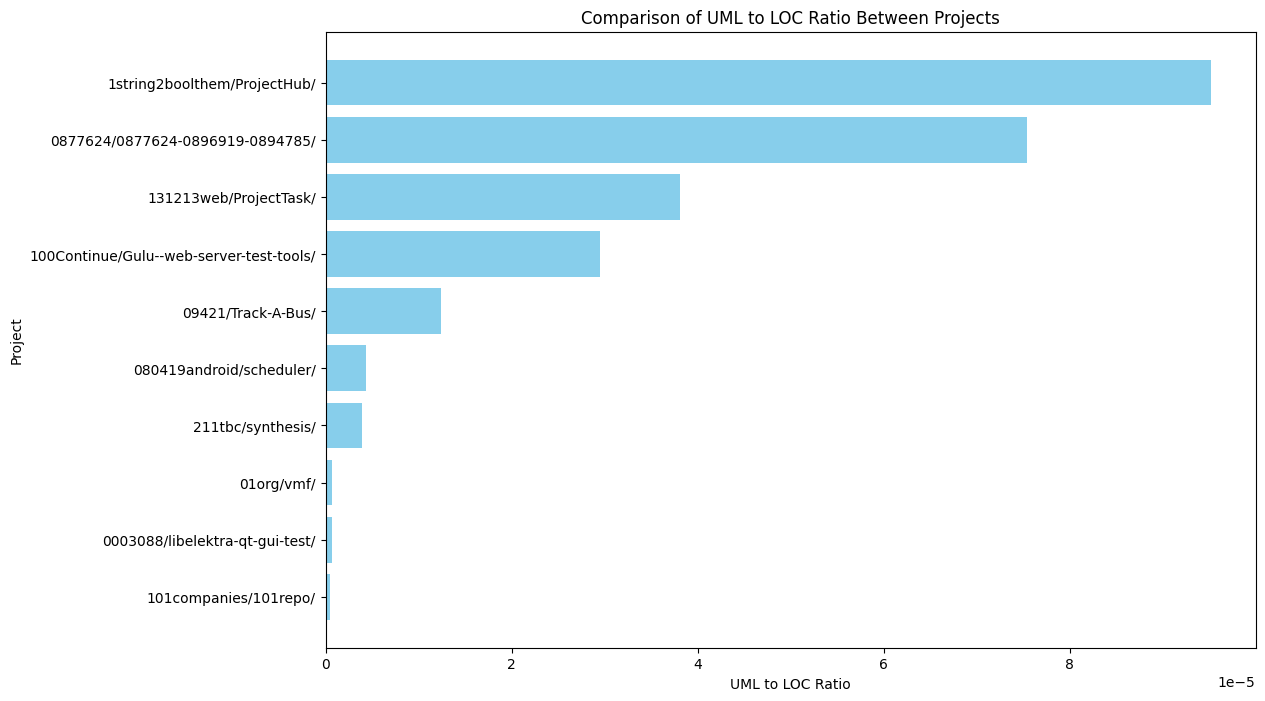

In [68]:
import matplotlib.pyplot as plt

# Sort the dataframe by UML_LOC_Ratio
merged_df_sorted = merged_df.sort_values(by='UML_LOC_Ratio', ascending=False)

# Plot the UML_LOC_Ratio
plt.figure(figsize=(12, 8))
plt.barh(merged_df_sorted['Project'], merged_df_sorted['UML_LOC_Ratio'], color='skyblue')
plt.xlabel('UML to LOC Ratio')
plt.ylabel('Project')
plt.title('Comparison of UML to LOC Ratio Between Projects')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest ratio at the top
plt.show()

In [59]:
merged_df['Old Models'].tolist()

[['doc/images/overview_plugins.xmi'],
 ['docs/design/LLD.uml'],
 ['Requirements/080419A - ClassDiagram_v_1_0_0.png'],
 ['UML Diagram/ModelDefinition/UML Diagram.uml'],
 ['1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Misc/Use_Case_Diagram.jpg',
  '1 - Systemdesign/3 - 4th/04_Systemdesign/Diagrammer/SSD/UC1 Simple Sequence Diagram.png',
  '1 - Systemdesign/3 - 4th/04_Systemdesign/Diagrammer/SSD/UC1.1 Simple Sequence Diagram.png',
  '1 - Systemdesign/3 - 4th/04_Systemdesign/Diagrammer/SSD/UC1.2 Simple Sequence Diagram.png',
  '1 - Systemdesign/3 - 4th/04_Systemdesign/Diagrammer/Use_Case_Diagram.jpg',
  '2 - Kravspec/2 - Samlet kravspec/Use_Cases/Diagrammer/Use_Case_Diagram.jpg',
  '4 - Rapport/4 semester/Billeder/Use_Case_Diagram.jpg',
  '4 - Rapport/Billeder/Use_Case_Diagram.jpg',
  '7 - Bilag/2 - Diagrammer/3 - Klassediagrammer/Administrator hjemmeside - klassediagram.jpg',
  '7 - Bilag/2 - Diagrammer/3 - Klassediagrammer/Mobil applikation - Klassediagram.jpg',
  '7 - Bilag/2 - Dia

In [60]:
merged_df['UML_Files'].tolist()

[['doc/images/classes.png',
  'doc/images/classes_large.png',
  'doc/images/state.png'],
 ['docs/design/LLD.uml'],
 ['Requirements/080419A - ClassDiagram_v_1_0_0.png'],
 ['DesPat/Content/Life-0.png',
  'DesPat/Content/Life-1.png',
  'DesPat/Content/Life-2.png',
  'DesPat/Content/Life-3.png',
  'UML Diagram/ModelDefinition/UML Diagram.uml'],
 ['1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/AktOrkontekst-diagram.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Database/MySQL_UML_Diagram.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Database/SQLite_UML_Diagram.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Klassediagrammer/App_klasseDia.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Klassediagrammer/App_klasseDia_models.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Klassediagrammer/Hjemmeside_KlasseDia.jpg',
  '1 - Systemdesign/1 - Ikke-samlede docs/Diagrammer/Klassediagrammer/Simulator_klasseDia.jpg',
  '1 - Systemdesign/1 -